In [35]:
import networkx as nx
import random

In [47]:
g = nx.erdos_renyi_graph(100, 0.1)

In [48]:
gamma = 0.005 # вероятность вылечиться за один шаг времени
beta = 0.01 # вероятность заразиться от соседа за один шаг времени

In [49]:
g = nx.erdos_renyi_graph(100, 0.1)

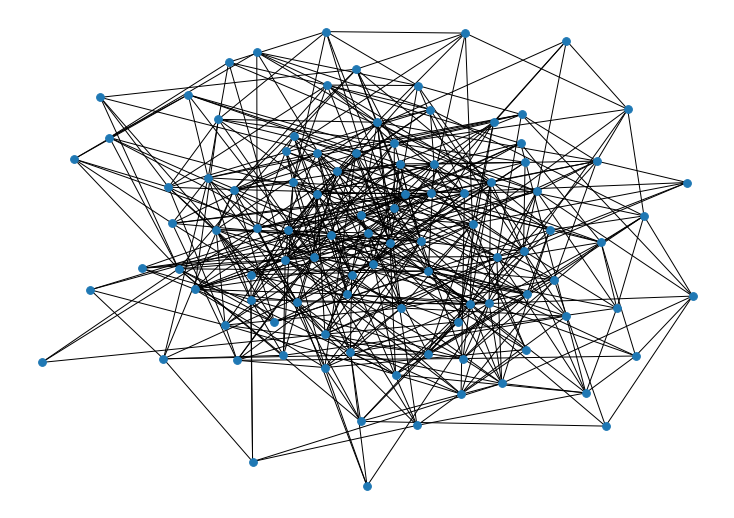

In [50]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10,7)) 
nx.draw(g,node_size=60,font_size=8)
plt.show()

In [51]:
# 0 - не болел (без иммунитета)
# 1 - болеет (заразный)
# 2 - выздровел (есть иммунитет)

In [52]:
active = list(g.nodes)
nodes_status = [0] * len(g) # изначально все без иммунитета

In [53]:
# пусть 12 заболел
nodes_status[12] = 1

In [54]:
# число дней  
N = 50

In [55]:
n = 0

while len(active) > 0 and n < N:
#     print(nodes_status)
    for v in active:
        # если вершина заражена
        if nodes_status[v] == 1:

            # заражает
            for i in g[v]:
                if (random.random() < beta) and (nodes_status[i] == 0):
                    nodes_status[i] = 1

            # выздоравливает
            if random.random() < gamma:
                    nodes_status[v] = 2
                    active.remove(v)
    n += 1        

In [56]:
from collections import Counter

count_status = Counter(nodes_status)

In [59]:
count_status

Counter({1: 63, 0: 32, 2: 5})

In [ ]:
# 0 - не болел (без иммунитета)
# 1 - болеет (заразный)
# 2 - выздровел (есть иммунитет)

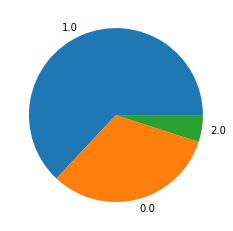

In [58]:
# распределение людей по группам за N временных шагов 
plt.pie([float(v) for v in count_status.values()], labels=[float(k) for k in count_status],
           autopct=None);

In [60]:
def plot_graph(g, coloring = [], palette = plt.cm.brg):
    with plt.xkcd():
        k = nx.degree(g)
        plt.figure(1, figsize=(30,30))
        coord = nx.kamada_kawai_layout(g)
        if len(coloring) > 0:
            nx.draw_networkx(g, pos=coord, nodelist=[x[0] for x in k], node_size=[v[1]*50 for v in k],
            font_size=17, node_color=coloring, cmap=palette)
        else:
            nx.draw_networkx(g, pos=coord, nodelist=[x[0] for x in k], node_size=[v[1]*50 for v in k],
            font_size=17)

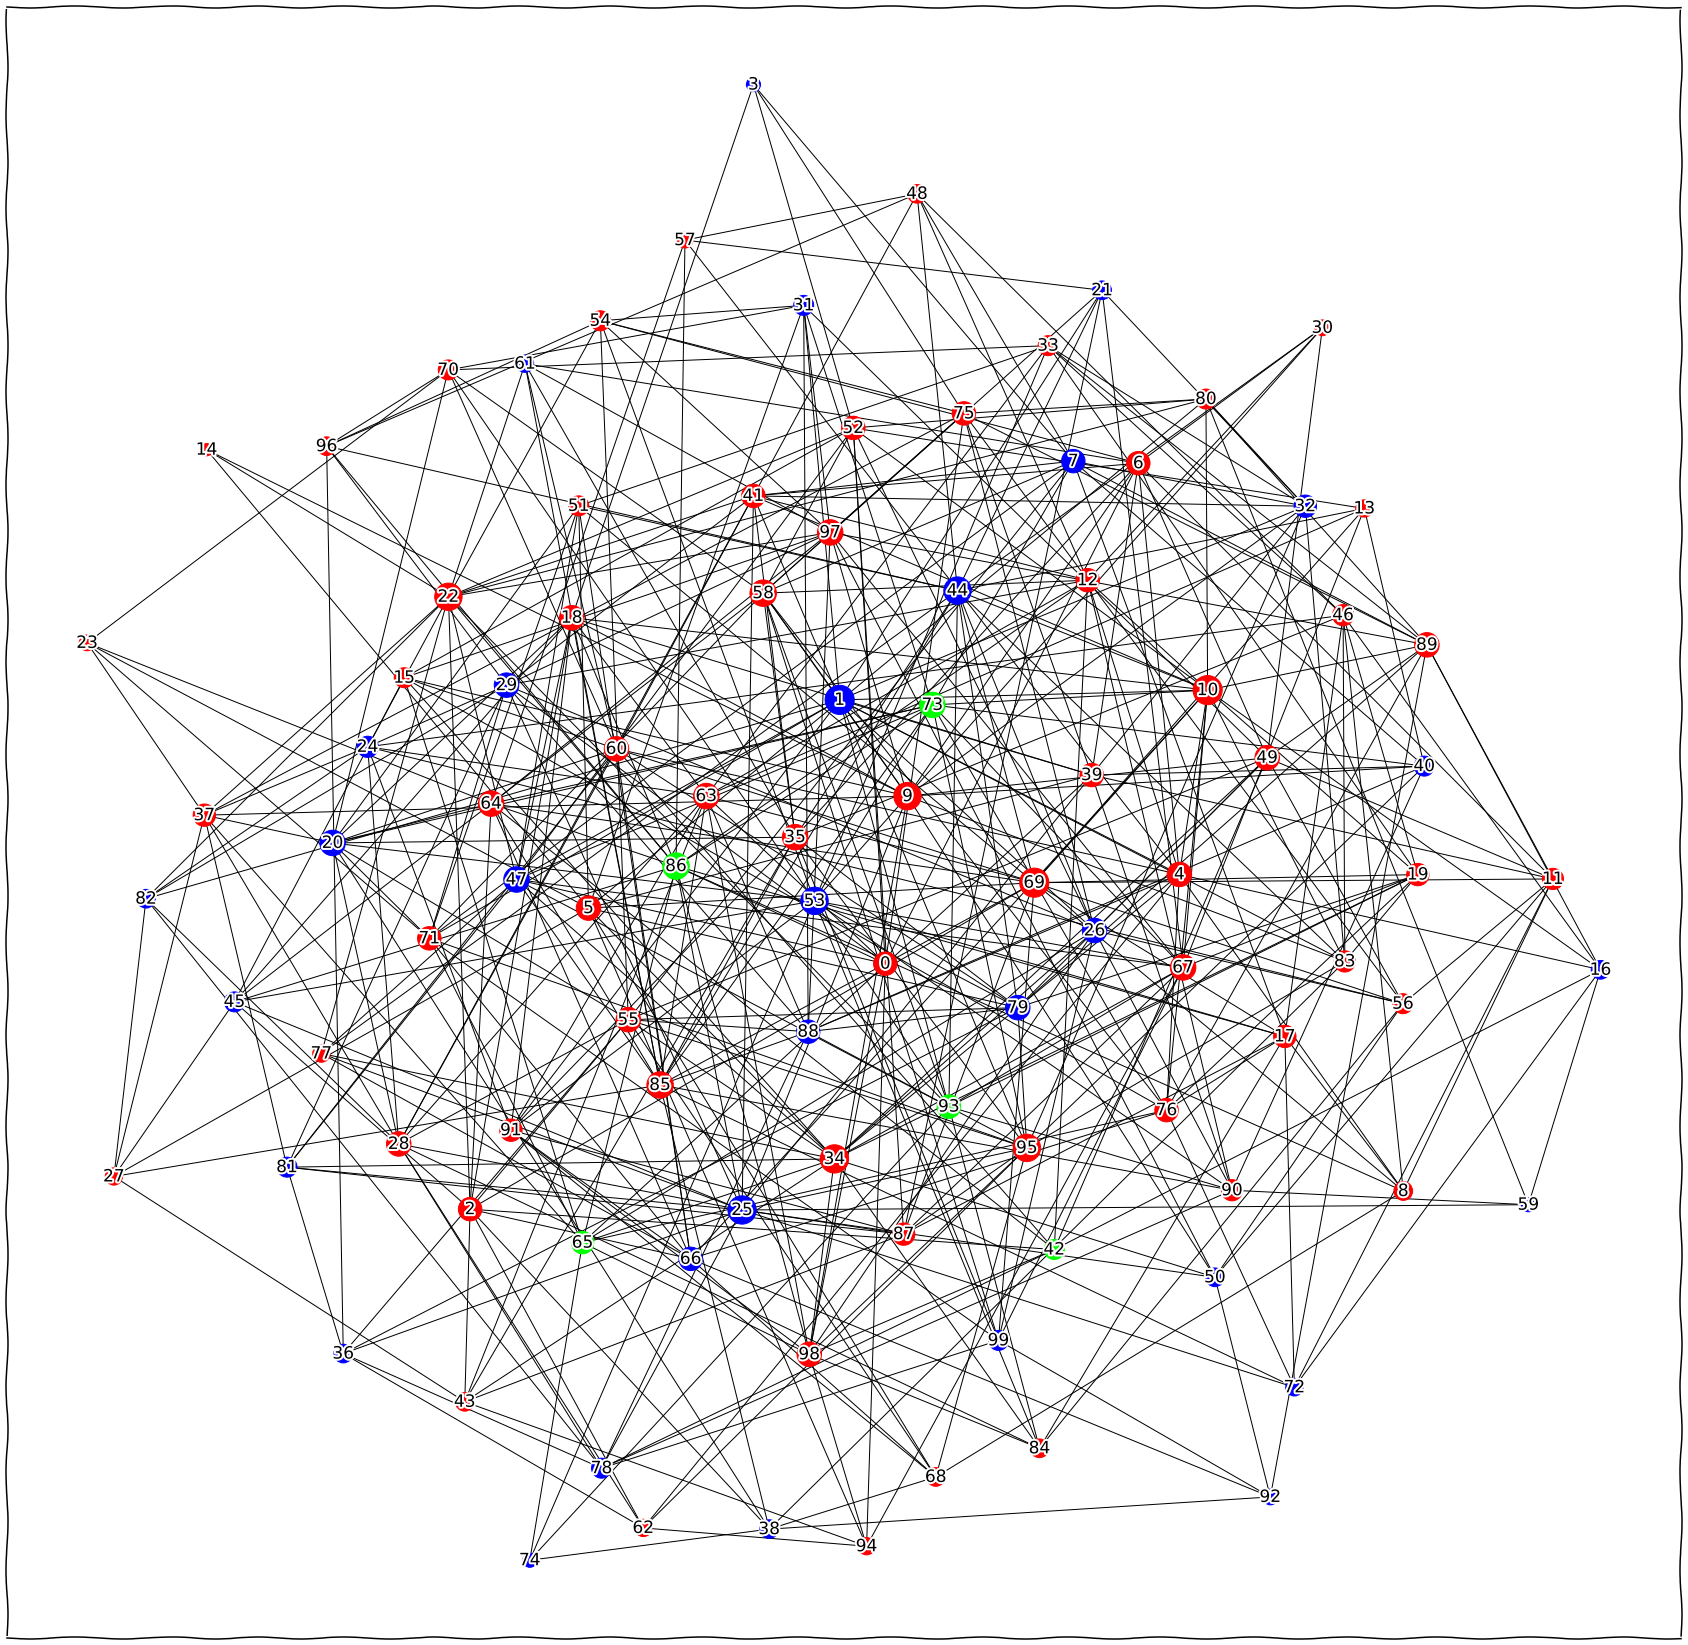

In [61]:
plot_graph(g, nodes_status)